In [1]:
import kamping.parser.network as network
import networkx as nx

In [12]:
graph  = network.KeggGraph('../data/kgml_hsa/hsa04910.xml', type='mpi')
graph.interaction

,entry1,entry2,type,name,value,entry1_type,entry2_type,direction
0,10580,10211,PPrel,binding/association,---,gene,gene,undirected
1,10580,2319,PPrel,binding/association,---,gene,gene,undirected
2,10603,867,PPrel,activation,-->,gene,gene,directed
3,10603,868,PPrel,activation,-->,gene,gene,directed
4,10603,867,PPrel,inhibition,--|,gene,gene,directed
...,...,...,...,...,...,...,...,...
748,5170,5590,PCrel,activation,-->,gene,gene,directed
749,5170,5584,PCrel,phosphorylation,+p,gene,gene,directed
750,5170,5590,PCrel,phosphorylation,+p,gene,gene,directed
751,57521,2475,PPrel,protein-complex,custom,gene,gene,undirected


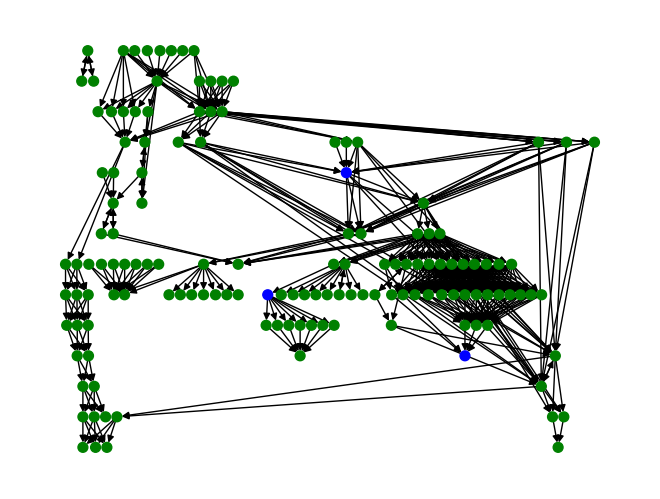

In [20]:
from matplotlib import pyplot as plt
graph_nx = graph.to_networkx()
color_map = {'compound': 'blue', 'gene': 'green'}

# Extract node types
node_types = nx.get_node_attributes(graph_nx, 'type')
node_colors = [color_map.get(node_types.get(node), 'gray') for node in graph_nx.nodes]

pos = nx.nx_agraph.graphviz_layout(graph_nx, prog='dot')  # positions for all nodes
nx.draw(graph_nx, node_size=50, pos=pos, node_color=node_colors, with_labels=False)